In [1]:
!pip install -e ..

Obtaining file:///export/home/figs/vdesouza/work/Holography-1022/astrohack
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for astrohack (pyproject.toml) ... done
  Created wheel for astrohack: filename=astrohack-0.0.1-py3-none-any.whl size=1059 sha256=06aa67deff29d353eb3509beba5c19f1a9969629944b85bab9cc273444b0ad19
  Stored in directory: /tmp/pip-ephem-wheel-cache-t72in4g2/wheels/93/bb/ed/46bdf801cce81c3aea69f1f4af83e386e0f89149047ab78ae0
Successfully built astrohack
  Attempting uninstall: astrohack
    Found existing installation: astrohack 0.0.1
    Uninstalling astrohack-0.0.1:
      Successfully uninstalled astrohack-0.0.1


In [3]:
from astrohack._utils._phase_fitting import _correct_phase, phase_fitting
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Simple Function to allow us to plot out phase images
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plot_phase_image(image):
    fig, ax = plt.subplots(1, 1, figsize=[10, 5])
    im = ax.imshow(image.T, cmap="viridis", interpolation="nearest")
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, label="Z Scale", cax=cax)

In [4]:
# setting up a few telescope related parameters
npix = 256
dummyimg = np.zeros((npix,npix))
ampimg = phaseimg +1. #(np.random.rand(npix,npix)-0.5)*10.0
cellxy = 0.046875 # meters
magnification = 13 # Adimensional 
focal_length = 8 # meters
phase_slope = 0
wavelength = 0.34 # meters
rmin = -1e-300 # radius of 1 meter
rmax = -1e2 # radius of 12 meters
enable = False
secondary_z_offset = 2 # meters

In [5]:
# Setting the perturbations for the phase
phase_off = 3
x_pnt_off = np.pi/8 -2
y_pnt_off = np.pi/4
x_foc_off = np.pi/3
y_foc_off = 0.5
z_foc_off = np.pi/3 +1
x_til_off = 0.1
y_til_off = -0.2
x_cas_off = 0.3
y_cas_off = -0.4
parameters = [phase_off, x_pnt_off, y_pnt_off, x_foc_off, y_foc_off, z_foc_off, x_til_off, y_til_off, x_cas_off, y_cas_off]

In [15]:
%%time
# Here we create a model phase image from the phase perturbations added above
corrected, model = _correct_phase(phaseimg, cellxy, parameters, magnification, focal_length, phase_slope)

CPU times: user 657 ms, sys: 651 µs, total: 658 ms
Wall time: 658 ms


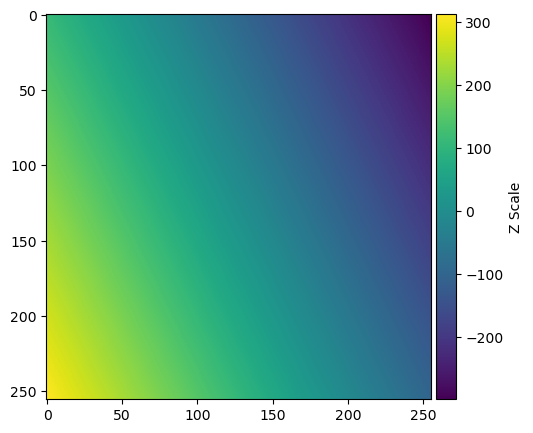

In [16]:
# here is the model we are using
plot_phase_image(model)

In [17]:
%%time
# here we do the actual phase fitting
fitting = phase_fitting(wavelength, focal_length, rmin, rmax, cellxy, ampimg, model, enable, enable, enable,
                       enable, enable, magnification, secondary_z_offset, phase_slope)

CPU times: user 2.39 s, sys: 334 ms, total: 2.72 s
Wall time: 2.32 s


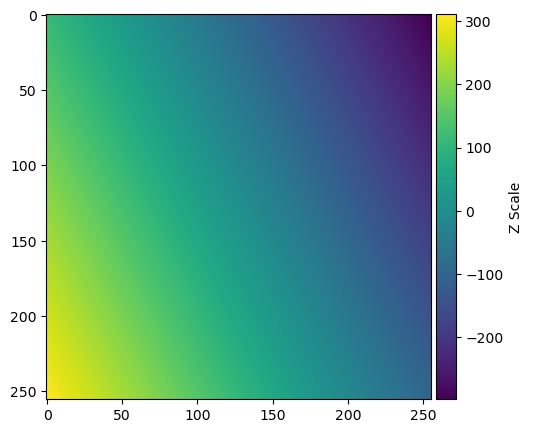

In [18]:
# here is the model derived from phase fitting
plot_phase_image(fitting[3])

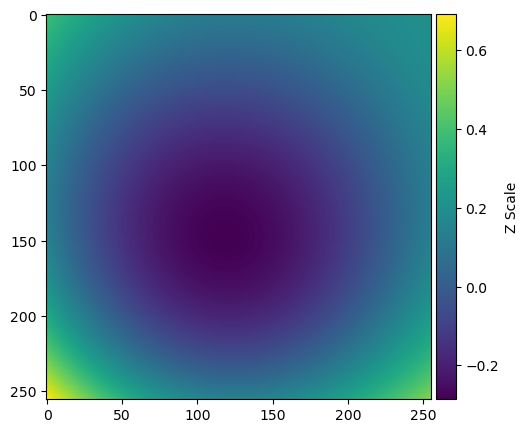

In [19]:
# here are the residuals after the phase fitting
plot_phase_image(fitting[2])